In [362]:
# Import Statements 
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.corpus import stopwords 
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import pickle

In [311]:
df = pd.read_csv('spam.csv')
df.sample(5)

,v1,v2,unnamed: 2,unnamed: 3,unnamed: 4
2714,ham,I am thinking of going down to reg for pract l...,NaN,NaN,NaN
5285,spam,URGENT! You have won a 1 week FREE membership ...,NaN,NaN,NaN
1977,spam,Reply to win �100 weekly! Where will the 2006 ...,NaN,NaN,NaN
3106,ham,Hi. Happy New Year. I dont mean to intrude but...,NaN,NaN,NaN
1368,ham,Alright. I'm out--have a good night!,NaN,NaN,NaN


In [312]:
df.shape

(5572, 5)

**PROBLEM SOLVING APPROCH**

1 :- Data Cleaning

2 :- EDA

3 :- Text Processing

4 :- Model

5 :- Eval

6 :- Changes

7 :- Website

8 :- Deploy

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   unnamed: 2  50 non-null     object
 3   unnamed: 3  12 non-null     object
 4   unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**1:-DATA CLEANING**

In [314]:
# So based on the info of the above dataframe we can see that the last three is useless and that only have max 50 values in each column which is useless so we are removing that all three column so that we can work on other column

df.drop(columns=['unnamed: 2','unnamed: 3','unnamed: 4'] , inplace=True)
df.sample(5)

,v1,v2
3409,ham,Joy's father is John. Then John is the ____ of...
5282,ham,I have gone into get info bt dont know what to do
5055,ham,Goodnight da thangam I really miss u dear.
3702,ham,How is my boy? No sweet words left for me this...
47,ham,"Fair enough, anything going on?"


In [315]:
# Renaming the columns 
df.columns
df.columns = ["target" , "text"]

In [316]:
# Encoding the Label as 0 and 1
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [317]:
# Missing Values Checking
df.isnull().sum()

target    0
text      0
dtype: int64

In [318]:
# Check for duplicate Values
df.duplicated().sum()

np.int64(403)

In [319]:
df = df.drop_duplicates(keep='first')

In [320]:
df.shape

(5169, 2)

**2:-EDA**

In [321]:
# Just checking how many are Spam and not Spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

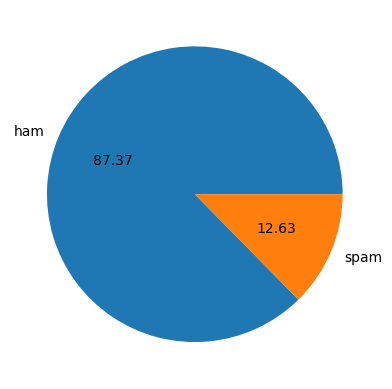

In [322]:
plt.pie(df['target'].value_counts() , labels=['ham','spam'],autopct="%.2f")
plt.show()

In [323]:
# Data is imbalanced as we can say spam is less than ham so we have to carefull while seperating them into train test split

In [324]:
nltk.download('punkt')
nltk.download('punkt_tab')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [325]:
# this is the lenght of the text like how many char are there in it.
df['num_characters'] = df['text'].apply(lambda x : len(x))

In [326]:
# this is the number of words in the text like how many words are there in the text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [327]:
# This if the number of sentense availbale in the text
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [328]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [329]:
# This is the overall Distribution... 
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [330]:
# Lets check for the Ham only how the describe looks like
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [331]:
# Lets check for the Spam only how the describe looks like
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

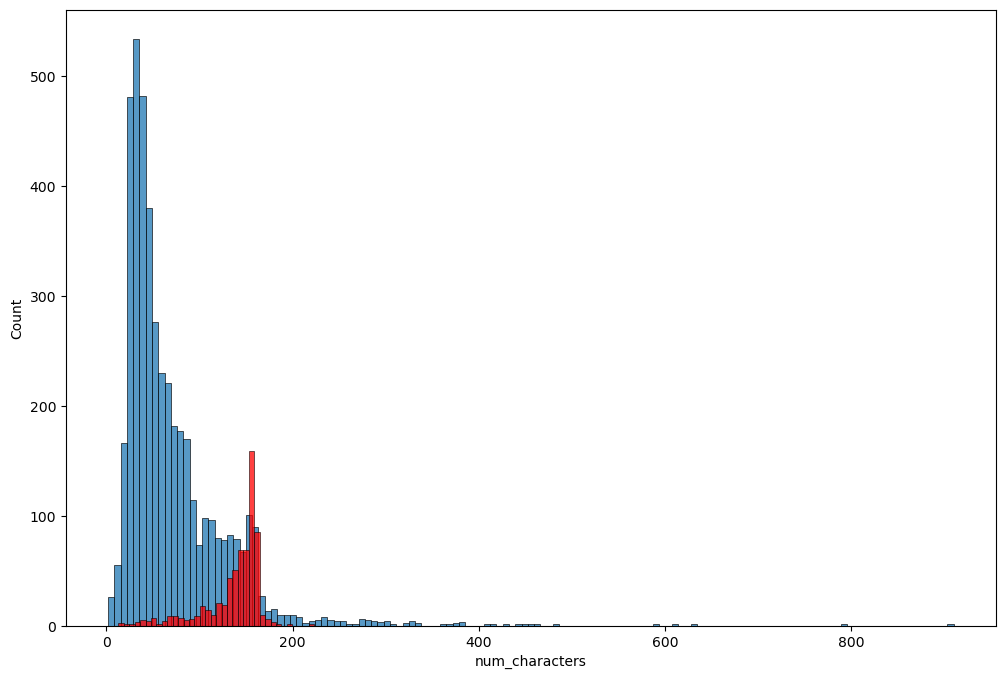

In [332]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color="red")

# so the graph below shows that the target == 1 means that spam email is having more number of characters...so it means that spam emails always big in size

[]

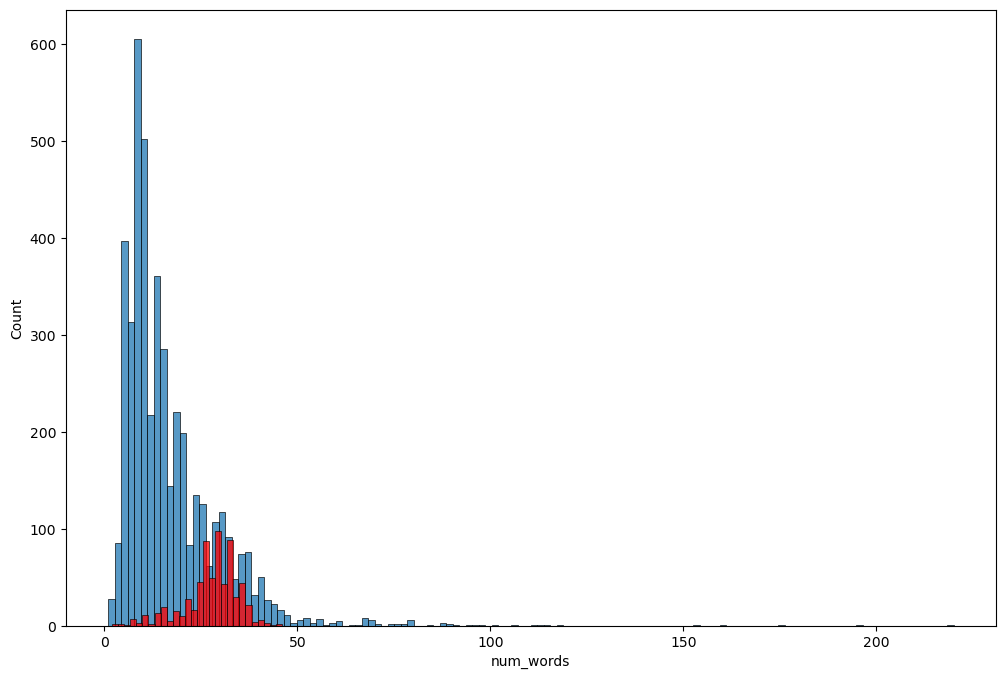

In [333]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color="red")
plt.plot()
# so the graph below shows that the target == 1 means that spam email is having more number of characters...so it means that spam emails always big in size

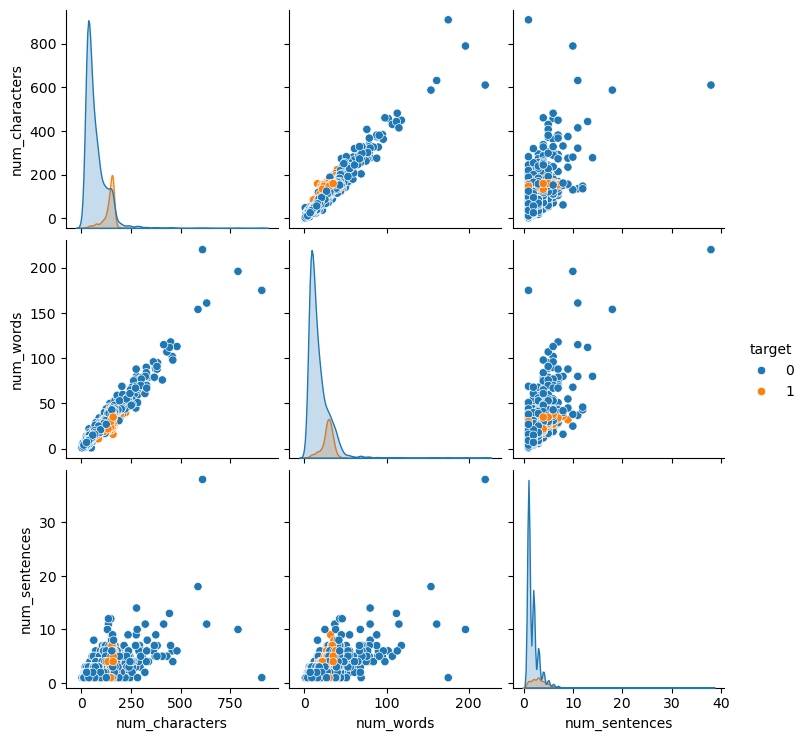

In [334]:
# Lets check relation of different pair with target...
sns.pairplot(df , hue= 'target')

<Axes: >

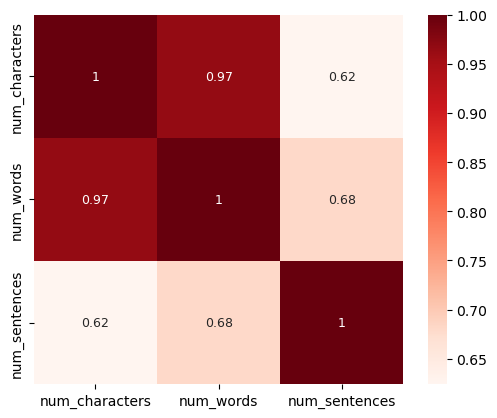

In [335]:
sns.heatmap(df[['num_characters','num_words','num_sentences']].corr() , cbar=True , square= True , annot= True , cmap="Reds",annot_kws={'size' : 9})

**3.Data Preprocessing**
* Lower case
* Tokenization
* Removing Special Char
* Removing stop words and punctuation
* Stemming

In [336]:
def transform_text(text):                               # I dont think this punctuation is required..
    text = text.lower()                                 # Lower
    text = nltk.word_tokenize(text)                     # Tokenizer 
    y = []
    ps = PorterStemmer()
    stop_word_list = stopwords.words('english')         # Stopwords list 
    for i in text:
        if i.isalnum():                                 #Check for stopwords and punctuations with Stemmer...
            if i not in stop_word_list and i not in string.punctuation: 
                i = ps.stem(i)
                y.append(i)

    return " " . join(y)

transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [337]:
df['transformed_text'] = df['text'].apply(transform_text)

In [338]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


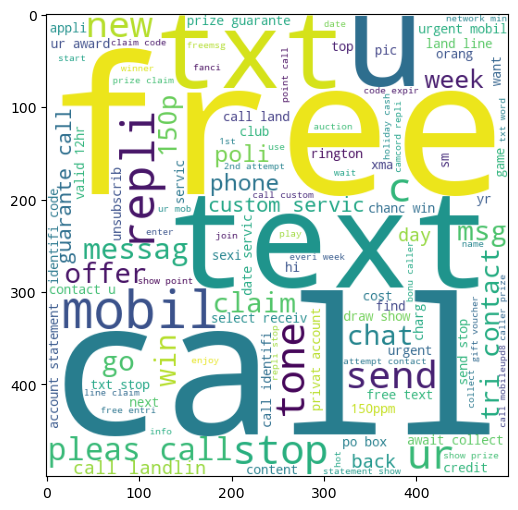

In [339]:
# MAKING WORD CLOUD OF SPAM
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')
spam_word_cloud = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.imshow(spam_word_cloud)
plt.show()
# Below are the words which is mostly used in the SPAM messages...

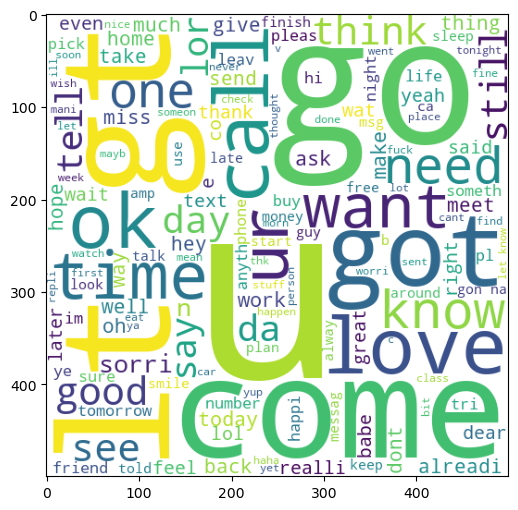

In [340]:
# MAKING WORD CLOUD FOR NOT SPAM
spam_word_cloud = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.imshow(spam_word_cloud)
plt.show()

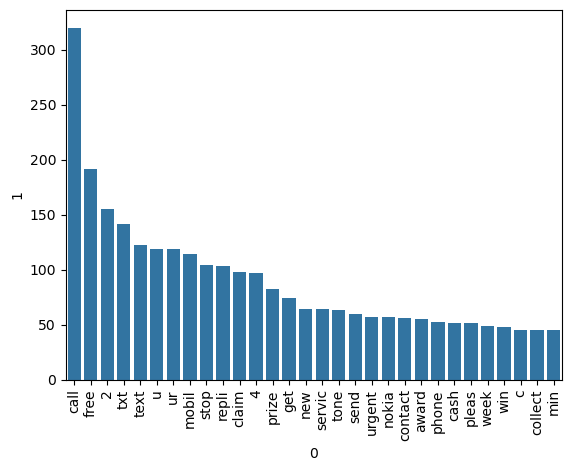

In [341]:
# Lets take top 30 words from spam and not spam...

spam_corpus = [] 
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for words in msg.split():
        spam_corpus.append(words)

temp_df = pd.DataFrame(Counter(spam_corpus).most_common(30)) 
sns.barplot(x=temp_df[0] , y=temp_df[1])
plt.xticks(rotation='vertical')                                   # rotating the X labels
plt.show()

**4. Model Building**

In machine learning the naive bayes machine learning is very popular in processing the text based analysis...

In [342]:
# We have to do Vectorization first...
cv = CountVectorizer()
tfid = TfidfVectorizer()                # So with this Tfid we can also do fit_transform below code..and go beyond
x = cv.fit_transform(df['transformed_text']).toarray()

In [343]:
x.shape

(5169, 6677)

In [344]:
y = df['target'].values 

In [345]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [346]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [347]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print( accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [348]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [349]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print( accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


FINDING DIFFERENT OTHER MODEL OUTPUT

In [350]:
# Importing all different Library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [351]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state= 2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators=50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators=50 , random_state=2)

In [352]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gdbt,
    'xgd' : xgb
}

In [353]:
def train_classfier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)

    return accuracy,precision

In [354]:
train_classfier(svc,x_train,y_train,x_test,y_test)

(0.9313346228239845, 0.7637795275590551)

In [355]:
accur_score = []
preci_score = []

for name,clf in clfs.items():
    current_accr,current_precs = train_classfier(clf,x_train,y_train,x_test,y_test)

    print("For ", name)
    print("Accuracy :- " , current_accr)
    print("Precision :- " , current_precs)

    accur_score.append(current_accr)
    preci_score.append(current_precs)

For  SVC
Accuracy :-  0.9313346228239845
Precision :-  0.7637795275590551
For  KN
Accuracy :-  0.9061895551257253
Precision :-  1.0
For  NB
Accuracy :-  0.965183752417795
Precision :-  0.84
For  DT
Accuracy :-  0.9235976789168279
Precision :-  0.9154929577464789
For  LR
Accuracy :-  0.9709864603481625
Precision :-  0.9736842105263158
For  RF
Accuracy :-  0.9700193423597679
Precision :-  0.9819819819819819
For  AdaBoost
Accuracy :-  0.9197292069632496
Precision :-  0.9365079365079365
For  BgC
Accuracy :-  0.9632495164410058
Precision :-  0.9166666666666666
For  ETC
Accuracy :-  0.9738878143133463
Precision :-  0.9826086956521739
For  GBDT
Accuracy :-  0.9458413926499033
Precision :-  0.9456521739130435
For  xgd
Accuracy :-  0.9738878143133463
Precision :-  0.9743589743589743


In [360]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy' : accur_score ,'Precision' : preci_score}).sort_values('Precision',ascending=False)

In [361]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
8,ETC,0.973888,0.982609
5,RF,0.970019,0.981982
10,xgd,0.973888,0.974359
4,LR,0.970986,0.973684
9,GBDT,0.945841,0.945652
6,AdaBoost,0.919729,0.936508
7,BgC,0.963250,0.916667
3,DT,0.923598,0.915493
2,NB,0.965184,0.840000


In [363]:
pickle.dump(cv , open('vectorizor.pkl' , 'wb'))
pickle.dump(bnb , open('model.pkl' , 'wb'))